In [35]:
from IPython.core.interactiveshell import InteractiveShell

In [88]:
from sortedcontainers import SortedList
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
# from util import get_data

def get_data(limit=None):
    print("Reading in and transforming data...")
    df = pd.read_csv('train.csv')
    data = df.as_matrix()
    np.random.shuffle(data)
    X = data[:, 1:] / 255.0 # data is from 0..255
    Y = data[:, 0]
    if limit is not None:
        X, Y = X[:limit], Y[:limit]
    return X, Y

class KNN():
    def __init__(self,k):
        self.k=k
        
    def fit(self,x,y):
        self.x=x
        self.y=y
    def predict(self,X):
        y=np.zeros(len(X))
        for i , x in enumerate(X):
            s1=SortedList()
            for j ,xt in enumerate(self.x):
                diff=x-xt
                d=diff.dot(diff)
                if len(s1)<self.k :
                    s1.add((d,self.y[j]))
                else:
                    if d<s1[-1][0] :
                        del s1[-1]
                        s1.add((d,self.y[j]))
                           
            votes={}
            for _ ,v in s1:
                votes[v]=votes.get(v,0)+1
            max_vote=0
            clss=-1
            for v,count in votes.items():
                if count>max_vote:
                    max_vote=count
                    clss=v
            y[i]=clss
        return y
                
    def score(self,X,Y):
        P=self.predict(X)
        return np.mean(P==Y)
    
    

Reading in and transforming data...

k 1
training time  0:00:00
train accuracy  1.0
training time taken  0:00:22.554025
test accuracy  1.0
testing time taken  0:00:29.097999

k 2
training time  0:00:00
train accuracy  1.0
training time taken  0:00:20.826815
test accuracy  1.0
testing time taken  0:00:29.305104

k 3
training time  0:00:00
train accuracy  0.956
training time taken  0:00:21.194300
test accuracy  0.956
testing time taken  0:00:30.968671

k 4
training time  0:00:00
train accuracy  0.959
training time taken  0:00:21.062466
test accuracy  0.959
testing time taken  0:00:32.519276

k 5
training time  0:00:00
train accuracy  0.945
training time taken  0:00:21.185257
test accuracy  0.945
testing time taken  0:00:30.375231


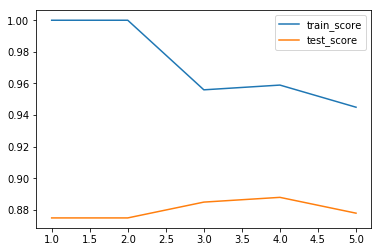

In [89]:
if __name__=='__main__':
    X,Y=get_data(2000)
    Ntrain=1000
    Xtrain,Ytrain=X[:Ntrain],Y[:Ntrain]
    Xtest,Ytest=X[Ntrain:],Y[Ntrain:]
    train_scores=[]
    test_scores=[]
    ks=(1,2,3,4,5)
    for k in ks:
        print('\nk' , k)
        knn=KNN(k)
        t0=datetime.now()
        knn.fit(Xtrain,Ytrain)
        print('training time ' , datetime.now()-t0)
        
        t0=datetime.now()
        train_score=knn.score(Xtrain,Ytrain)
        train_scores.append(train_score)
        print('train accuracy ', train_score)
        print('training time taken ',datetime.now()-t0 )

        t0=datetime.now()
        test_score=knn.score(Xtest,Ytest)
        test_scores.append(test_score)
        print('test accuracy ', train_score)
        print('testing time taken ',datetime.now()-t0 )
    plt.plot(ks,train_scores,label='train_score')
    plt.plot(ks,test_scores,label='test_score')
    plt.legend()
    plt.show()
            

# Knn Fails 

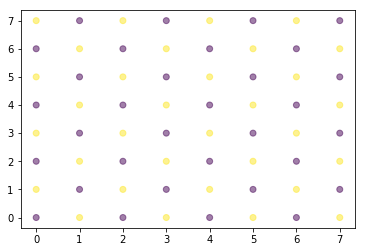

accuracy  0.0


In [95]:
def get_data1():
    width=8
    height=8
    N=width*height
    x=np.zeros((N,2))
    y=np.zeros(N)
    start_t=0
    n=0
    for i in range(width):
        t=start_t
        for j in range(height):
            x[n]=[i,j]
            y[n]=t;
            t=(t+1)%2
            n+=1
        start_t=(start_t+1)%2
    return x,y
if __name__=="__main__":
    x,y=get_data1()
    plt.scatter(x[:,0],x[:,1],c=y,alpha=.5)
    plt.show()
    knn=KNN(3)
    knn.fit(x,y)
    print('accuracy ',knn.score(x,y))
# print(x,y)

## xor problem

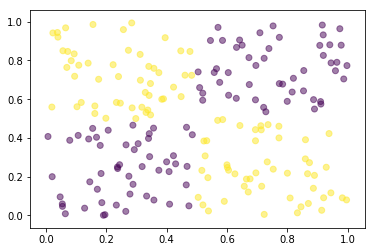

accuracy  0.985


In [116]:
from util import get_xor

if __name__ =="__main__":
    x,y=get_xor()
    plt.scatter(x[:,0],x[:,1],c=y,alpha=.5)
    plt.show()
    knn=KNN(3)
    knn.fit(x,y)
    print('accuracy ',knn.score(x,y))
    
